<a href="https://colab.research.google.com/github/ManJ-PC/Psychosis-AI/blob/master/Anivers%C3%A1rioW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
x = 0

In [15]:
print(x)

0


Isto é um teste!

In [16]:
x = 123

In [17]:
import sys
import socks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as KFold
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from IPython.display import display
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets # buscar datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [18]:
# Load a simple toy dataset, bibliotecas com um dataset já pré feitos, este é do cancro da mama
data = datasets.load_breast_cancer() #load do dataset

X = data.data # 30 caracteristicas este dataset
y = data.target 

# uma linha de X bate certo com uma linha de y ... and so on
print(X[0])
print(y[0])
print(data.target_names[y[0]]) # mostra o valor das 30 características
#
lista_benigno = [exemplo for exemplo in range(len(y)) if y[exemplo] == 1] # listas por comprensão , filtrar a lista lendo a própria lista (Matrioska effect)
print(lista_benigno)
x_benigno = X[lista_benigno]
y_benigno = y[lista_benigno]
print(len(x_benigno))
#
lista_maligno = [exemplo for exemplo in range(len(y)) if y[exemplo] == 0] # operações matriciais, o python poupa muito código ...
print(lista_maligno) # muito python simples e que podemos retirar dos arrays e nomes das features .. etc
x_maligno = X[lista_maligno]
y_maligno = y[lista_maligno]
print(len(x_maligno)) 
print(len(X))


[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0
malignant
[19, 20, 21, 37, 46, 48, 49, 50, 51, 52, 55, 58, 59, 60, 61, 63, 66, 67, 68, 69, 71, 74, 76, 79, 80, 81, 84, 88, 89, 90, 92, 93, 96, 97, 98, 101, 102, 103, 104, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 120, 123, 124, 125, 128, 130, 133, 136, 137, 139, 140, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 163, 165, 166, 169, 170, 173, 174, 175, 176, 178, 179, 183, 185, 187, 188, 189, 191, 192, 195, 200, 204, 206, 208, 209, 211, 216, 217, 220, 221, 222, 224, 225, 226, 227, 228, 231, 232, 234, 235, 238, 240, 241, 242, 243, 245, 246, 247, 248, 249, 251, 266, 267, 268, 269, 270, 271, 273, 275, 276, 278, 279, 281, 284, 285, 286, 287, 2

In [19]:
lista_benigno

[19,
 20,
 21,
 37,
 46,
 48,
 49,
 50,
 51,
 52,
 55,
 58,
 59,
 60,
 61,
 63,
 66,
 67,
 68,
 69,
 71,
 74,
 76,
 79,
 80,
 81,
 84,
 88,
 89,
 90,
 92,
 93,
 96,
 97,
 98,
 101,
 102,
 103,
 104,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 120,
 123,
 124,
 125,
 128,
 130,
 133,
 136,
 137,
 139,
 140,
 142,
 143,
 144,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 158,
 159,
 160,
 163,
 165,
 166,
 169,
 170,
 173,
 174,
 175,
 176,
 178,
 179,
 183,
 185,
 187,
 188,
 189,
 191,
 192,
 195,
 200,
 204,
 206,
 208,
 209,
 211,
 216,
 217,
 220,
 221,
 222,
 224,
 225,
 226,
 227,
 228,
 231,
 232,
 234,
 235,
 238,
 240,
 241,
 242,
 243,
 245,
 246,
 247,
 248,
 249,
 251,
 266,
 267,
 268,
 269,
 270,
 271,
 273,
 275,
 276,
 278,
 279,
 281,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 298,
 299,
 301,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 318,
 319,
 320,
 32

In [20]:
type(X)

numpy.ndarray

In [21]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [22]:
print(data.feature_names)
print(data.target_names)
print(X.shape)
print(y.shape) # é a 31ª coluna deste conj. de dados    

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
(569, 30)
(569,)


Cria uma função que permita treinar um modelo e guardar resultados!


In [23]:
def model_train_and_evaluate(a_classifier, _x_train, _y_train, _x_test, _y_test, key=""):  # o que acontece com o sklearn, todos os modelos fit e predict tem.. e mudasse o tipo de classificadores aqui

  a_model = a_classifier.fit(_x_train, _y_train) #dá para todos os modelos de classificador que pretenda
# fase de treino e fit -> train , mudou nome das varíaveis para não coincidirem em memória .. é eager precisa dos dados completos para fazer o fit etc
  yproba = a_model.predict_proba(_x_test)[::,1]  # da uma noção e confiança sobre aquela amostra
  ypredicted = a_model.predict(_x_test)
# lista inteira de exemplo, em que depois bate tudo certo...
  # extract metrics  tipically y_true, y_pred # groundtrue  e y que foram previstos.., slides das métricas vai disponibilizar... , matriz de confusão
  fpr, tpr, _ = roc_curve(_y_test, yproba) #f_measure também!
  auc = roc_auc_score(_y_test, yproba)
  conf_m = confusion_matrix(_y_test, ypredicted) # extraí um conj. de métricas de performance
  mcc = matthews_corrcoef(_y_test, ypredicted)
  f1 = f1_score(_y_test, ypredicted)
  # we can add more..
  result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc', 'f1', 'mcc', 'confusion_matrix']) # faz datasets bem construídos e legíveis (dados e visualmente)
  result_table = result_table.append({'classifiers':a_classifier.__class__.__name__+"-"+key,
                                     'fpr':fpr,
                                     'tpr':tpr,
                                     'auc':auc,
                                     'confusion_matrix': conf_m,
                                     'mcc':mcc,
                                     'f1': f1}, ignore_index=True)
  return result_table #fica numa tabela em result

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1234) # devolve uma lista de variáveis (decomposição) separadas por vírgulas, faz o split do dataset total
print(X_train.shape) # rnadom_state com valor fixo para conseguirmos garantir que conseguimos replicar. 




(398, 30)


In [25]:
#results = model_train_and_evaluate(DecisionTreeClassifier(random_state=2020), X_train, y_train, X_test, y_test)
results = model_train_and_evaluate(DecisionTreeClassifier(random_state=2020), X_train, y_train, X_test, y_test) # Aproveitar o classificadores que já existem
results.head()

,classifiers,fpr,tpr,auc,f1,mcc,confusion_matrix
0,DecisionTreeClassifier-,"[0.0, 0.12121212121212122, 1.0]","[0.0, 0.9333333333333333, 1.0]",0.906061,0.92891,0.814475,"[[58, 8], [7, 98]]"


In [26]:
# lista para usar e fazer mais tarde o gráfico da ROC + pontos todos de threshold, a tender muito para os positivos.VP-58 Falsos negativos 8, Falsos Negativos 7 FP - 98
# todos os classificadores tem fit e predict 

# matriz de confusão    TP   FP     58    8
#                       FN   TN      7   98
#

In [27]:
def plot_roc_insame(result_table):
    result_table.set_index('classifiers', inplace=True)
    
    fig = plt.figure(figsize=(8,6))
    
    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
        
    plt.plot([0,1], [0,1], color='black', linestyle='--') # random chance!
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    plt.show()

#plot_roc_insame(results)

In [28]:
"""classifiers = [GaussianNB(),
               KNeighborsClassifier(n_neighbors=3),
               DecisionTreeClassifier(random_state=2020),
               RandomForestClassifier(random_state=2020),
               SVC(kernel="linear", C=0.025, probability=True)
               ]

result = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc', 'f1', 'mcc', 'confusion_matrix'])

# train !
for cls in classifiers:
  results = results.append(model_train_and_evaluate(cls, X_train, y_train, X_test, y_test))
  
results.head()
print(results)
plot_roc_insame(results)"""

'classifiers = [GaussianNB(),\n               KNeighborsClassifier(n_neighbors=3),\n               DecisionTreeClassifier(random_state=2020),\n               RandomForestClassifier(random_state=2020),\n               SVC(kernel="linear", C=0.025, probability=True)\n               ]\n\nresult = pd.DataFrame(columns=[\'classifiers\', \'fpr\', \'tpr\', \'auc\', \'f1\', \'mcc\', \'confusion_matrix\'])\n\n# train !\nfor cls in classifiers:\n  results = results.append(model_train_and_evaluate(cls, X_train, y_train, X_test, y_test))\n  \nresults.head()\nprint(results)\nplot_roc_insame(results)'

                classifiers  ...      confusion_matrix
0              GaussianNB-0  ...  [[52, 14], [5, 100]]
0    KNeighborsClassifier-1  ...  [[56, 10], [2, 103]]
0    KNeighborsClassifier-2  ...   [[58, 8], [3, 102]]
0  RandomForestClassifier-3  ...  [[56, 10], [2, 103]]
0                     SVC-4  ...   [[57, 9], [3, 102]]
0                     SVC-5  ...   [[58, 8], [3, 102]]

[6 rows x 7 columns]


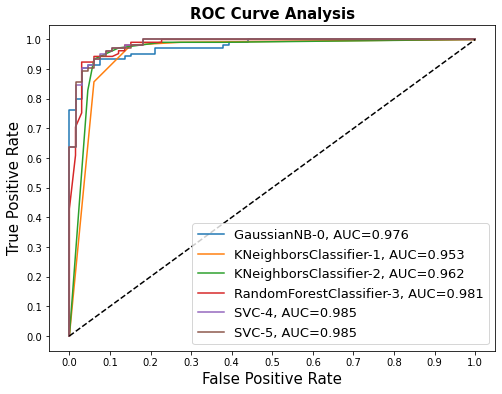

In [29]:
# create a set of other models
classifiers = [GaussianNB(), 
               KNeighborsClassifier(n_neighbors=3),
               KNeighborsClassifier(n_neighbors=5), 
               RandomForestClassifier(random_state=2020),
               SVC(kernel="linear", C=0.025, probability=True),
               SVC(kernel="linear", C=0.01, probability=True)
              ]
# perceber as diferenças das abordagens, segundo as mesmas condições..
results = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','f1', 'mcc', 'confusion_matrix'])
import random
# train !
i = 0
for cls in classifiers:
    results = results.append(model_train_and_evaluate(cls, X_train, y_train, X_test, y_test, str(i)))
    i+=1
# pipeline completo de de fazer lcassificação e avaliar com as métricas, obter X de treino e feature e ir buscar as características (princípio ), camada de classificação estendida e .. métodos mais simples
results.head()
print(results)
plot_roc_insame(results) 

In [30]:
results

,fpr,tpr,auc,f1,mcc,confusion_matrix
classifiers,,,,,,
GaussianNB-0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01515151...","[0.0, 0.3523809523809524, 0.38095238095238093,...",0.976046,0.913242,0.764471,"[[52, 14], [5, 100]]"
KNeighborsClassifier-1,"[0.0, 0.06060606060606061, 0.15151515151515152...","[0.0, 0.8571428571428571, 0.9809523809523809, ...",0.952814,0.944954,0.852898,"[[56, 10], [2, 103]]"
KNeighborsClassifier-2,"[0.0, 0.045454545454545456, 0.0606060606060606...","[0.0, 0.8285714285714286, 0.9333333333333333, ...",0.962266,0.948837,0.864042,"[[58, 8], [3, 102]]"
RandomForestClassifier-3,"[0.0, 0.0, 0.015151515151515152, 0.01515151515...","[0.0, 0.42857142857142855, 0.6095238095238096,...",0.981313,0.944954,0.852898,"[[56, 10], [2, 103]]"
SVC-4,"[0.0, 0.0, 0.0, 0.015151515151515152, 0.015151...","[0.0, 0.009523809523809525, 0.638095238095238,...",0.985426,0.944444,0.851824,"[[57, 9], [3, 102]]"
SVC-5,"[0.0, 0.0, 0.0, 0.015151515151515152, 0.015151...","[0.0, 0.009523809523809525, 0.638095238095238,...",0.984993,0.948837,0.864042,"[[58, 8], [3, 102]]"


Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 106.3774 - accuracy: 0.5352
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 78.7164 - accuracy: 0.4171
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 61.0416 - accuracy: 0.4874
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 42.3309 - accuracy: 0.5276
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 37.6507 - accuracy: 0.5327
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 31.6486 - accuracy: 0.5553
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 21.1456 - accuracy: 0.6080
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 17.9271 - accuracy: 0.6508
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 13.4966 - accuracy: 0.6935
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 11.6826 - accuracy: 0.716

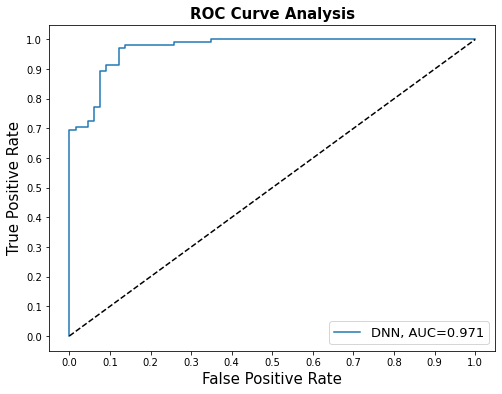

,fpr,tpr,auc,f1,mcc,confusion_matrix
classifiers,,,,,,
DNN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.38095238095238093, 0.3904761904761905,...",0.970996,0.943925,0.851324,"[[58, 8], [4, 101]]"


In [31]:
#aborgadem mais deep

def Deep_Model(activation = 'linear', neurons = 25, optimizer='Adam', input_size = 30): # a primeira camada o nº = ao número de inputs que estamos a usar (features?), neurónios.. colocar mais?
  model = Sequential() # fazer tuning desta parametrização toda , mais 5 parâmetros de cada lado, e tudo isto tem influência no resultado .. etc Promenores, de que classificadores usar e depende do que queiramos 
  # fully #1       
  model.add(Dense(neurons, input_dim=input_size, activation=activation))
  # fully #2
  model.add(Dense(neurons, activation= activation))
  #droput layer
  model.add(Dropout(0.3)) # filtro para regularizar nossa rede (apagando, parte da informação) treinar todos os seus pesos e não fixa em padrões de pesos. Rede aprende mais nada, dos padrões de peso
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
  return model

  # ensure the dataset!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1234)

# create ref to keras model # época é uma passagem pelo dataset completa, viu as 500etal amostras 100 vezes #questão de tunning dos parametros...
clf = KerasClassifier(build_fn=Deep_Model, epochs=100, batch_size=40, verbose=1) # é o que o sklearn usa para ter um modelo igual ao deles ..  etc, para ter um modelo igual aos pesos!

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

yproba = clf.predict_proba(X_test)[::,1]
#yproba = clf.predict.proba(X_test)
ypredicted = clf.predict(X_test)

# extract metrics  tipically   y_true,  y_pred
fpr, tpr, _ = roc_curve(y_test, yproba)
auc = roc_auc_score(y_test, yproba)
conf_m = confusion_matrix(y_test, y_pred)
mcc = matthews_corrcoef(y_test, ypredicted)
f1 = f1_score(y_test, ypredicted)

result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc', 'f1', 'mcc', 'confusion_matrix'])
result_table = result_table.append({'classifiers':"DNN",
                                    'fpr': fpr,
                                    'tpr': tpr,
                                    'auc': auc,
                                    'confusion_matrix': conf_m,
                                    'mcc': mcc,
                                    'f1': f1}, ignore_index=True)

print('AUC', auc)
print(classification_report(y_test,y_pred))
print(conf_m)

# plot roc curve!
plot_roc_insame(result_table)

result_table.head()

In [32]:
# focus com problemas de imagem, na onda do João Correia , sifar10 e sifar 1000